In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
company_df = pd.read_csv('data.csv')

In [20]:
company_df.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [21]:
company_df.shape

(6819, 96)

In [22]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Checking Missing values

In [23]:
sum(company_df.isnull().sum())

0

## Checking Duplicate values

In [24]:
company_df.duplicated().sum()

0

## Checking Target Column

In [25]:
company_df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [26]:
company_df['Bankrupt?'].value_counts(normalize=True)*100

0    96.77372
1     3.22628
Name: Bankrupt?, dtype: float64

<AxesSubplot:ylabel='Bankrupt?'>

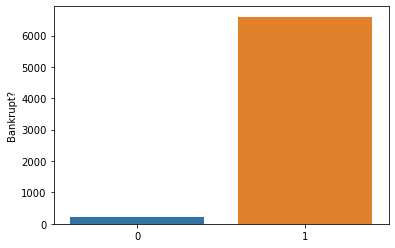

In [27]:
sns.barplot(x = company_df['Bankrupt?'].unique(),y = company_df['Bankrupt?'].value_counts())

#### Target column is highly imbalance

In [28]:
company_df[' Liability-Assets Flag'].unique()

array([0, 1])

In [29]:
company_df[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

In [30]:
company_df[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

##### Net Income Flag have only 1 unique value and liability assets flag has imbalance data so we drop them

In [31]:
df1= company_df.copy()

In [32]:
df1.drop([' Net Income Flag',' Liability-Assets Flag'],inplace=True,axis=1)

In [33]:
df1.shape

(6819, 94)

# Feature Selection

### VIF (Variance Inflation Factor)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [36]:
# compute the vif for all given features

# VIF greater than equal 5 for cols will be removed

# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)


def cal_vif(x):
    thresh = 5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    for i in range(1,k):
        print("Iteration no: ",i)
        print("VIF is: ",vif)
        a = np.argmax(vif)
        print("Max vif is for variable no: ",a)
        if(vif[a]<=thresh):
            break
        if (i==1):
            output = x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
            
    return output

In [37]:
considered_features = df1.drop('Bankrupt?',axis=1)

In [38]:
selected_features = cal_vif(considered_features)
selected_features.head()

Iteration no:  1
VIF is:  [69.01849527362054, 43.59546960546736, 102.89448842966425, 54294325.46095081, 1076.2915901817148, 181857501.02674413, 41509649.822630435, 1822.4659485776463, 10291917.038394947, 337.99416740347834, 1.2612409057444567, 1.0923554698690014, 7.558643471495546, 1.0416010166541465, 1.327451453085859, 782.0301911510805, 3911.811624690767, 3126.1563601353496, 32.0387871883508, 4.187190702235512, 4.360892738537997, 637.9945562307864, 21.713722401738735, 1.0395640475095058, 1.9329780762221893, 133.49737478917896, 132.6827778024381, 1.023089394981749, 1.1253183037761538, 1.1245861458943318, 1.8265709492744373, 3.6480611186309777, 1.358038772223051, 1.0598224326374872, 1.0089769113264977, 1.5570352377519325, 1447849284.0628052, 1598300635.1256354, 1.4719170107714865, 37.47957717444472, 9.119084237638905, 638.7818082844595, 30.099872110298385, 36.079332321010554, 5.900687233897576, 1.5683337940610833, 1.3076566054425993, 1.1411513223199183, 1.3401406556479307, 6.3814961352

Iteration no:  6
VIF is:  [69.01841905839117, 43.595456590430075, 102.89442288686574, 1076.2434672759448, 335.29293266145345, 2101.4482414657055, 1822.4668500831103, 87.79989039385823, 337.9950870017863, 1.2612411305027225, 1.0923559107882366, 7.558642168053709, 1.0416010021513564, 1.3274513938336774, 782.0327936063203, 3911.8228622887236, 3126.18821774541, 32.038759608928224, 4.187192845114681, 4.360889507457925, 637.9944238838834, 21.7136980049268, 1.0395640198421618, 1.9329779831528455, 133.4973650529191, 132.6828233827733, 1.0230893995923438, 1.125317104840984, 1.1245860605928604, 1.8265711059107148, 3.6480594362615557, 1.3580381736793312, 1.0598228272823649, 1.0089769683593124, 1.5570373026848552, 27.900079597879188, 1.4719167457666582, 37.47957842315343, 9.119084282873375, 638.7815064023449, 30.09986437213219, 36.079261520230325, 5.90068997723658, 1.5683344554173881, 1.307657419434204, 1.1411507900728526, 1.3401415319990293, 6.381479826668478, 3.337093587637314, 1.598465596622367

Iteration no:  11
VIF is:  [68.3353357949884, 43.44806936298956, 102.09294656151334, 1060.757375348616, 104.75294137602114, 313.057518244344, 19.314554599267986, 322.7754917334403, 1.2594981031369046, 1.08792354008231, 7.455298471196219, 1.0652914421921147, 2.23878361740199, 625.3100559808807, 626.7745168148423, 31.863017366253217, 4.059615393380097, 3.430396922484928, 621.1679561908223, 21.638595181593445, 1.0384565974337125, 132.73252016068022, 132.66280076315053, 1.0216790775134423, 1.120721892682294, 1.123468220228588, 1.646579867500145, 3.6100488742090135, 1.3576744581424816, 1.0575520882153344, 1.008153079653828, 1.5440551915752285, 27.888275750104217, 1.6101771946120615, 7.412790141592408, 621.5273323052597, 30.018921531303963, 34.6527084359086, 5.83659104019868, 1.5390719316239159, 1.3094570589384797, 1.1405037574497725, 1.5603570477062831, 5.792810255429982, 3.042342091315645, 1.5948176618513377, 1.1527675473101344, 23.758437479850755, 6.943749846522053, 5.583286884204895, 1.2

Iteration no:  17
VIF is:  [67.67053802968499, 41.82333776475325, 100.75563205637279, 2.4171718586518063, 87.18717424108767, 287.02714930976344, 16.98354940647117, 320.17161452809313, 1.2566033458864354, 1.0861593427765084, 7.409366950163361, 1.0635460039474447, 2.232153321220041, 622.364412453625, 621.7850178497229, 30.69916052708889, 3.4205512130307465, 3.4117328538590024, 475.4156576562331, 20.74903363454484, 1.036843518841472, 132.64994410616774, 132.65226171975473, 1.0210568834729201, 1.1171005627213484, 1.116057231935234, 1.346837146170816, 1.057464642003234, 1.0078338173885257, 1.5316037279183419, 27.259167377898205, 1.6092317005030836, 7.00178606244566, 479.01320590945414, 29.87069408697484, 23.136225753963213, 5.581397958438051, 1.5228984777758843, 1.3080891845786935, 1.1386694130746655, 1.332395024585804, 10.509518324968663, 3.0014880592815505, 240.0138648270975, 1.1523261780840623, 22.652918690052463, 46.062325261696444, 5.388730437673085, 1.2399136024629294, 1.0635400951037

Iteration no:  23
VIF is:  [919.1193297878693, 927.4602956937485, 211.8755456870116, 4.780788482811119, 197.4332829807189, 1.2190523470007348, 1.0782851900702066, 4407.702882319001, 1.0604536700969618, 2.0260877920121216, 98.10753356224312, 1080.7954541931797, 1142.9206736808787, 2.8349368512870363, 7627.483499940172, 609.6705776039175, 4.599235739798283, 132.54330503967932, 132.595993350959, 477.8254836221615, 1.0835802490395476, 1.11103253931345, 1.3355810104522354, 1.0556196804460838, 0.9750434131408805, 1.463242855534569, 141.32145386738694, 1.6060500925789305, 6.080301496530633, 7751.938547550819, 918.4517198617169, 7.1806701058496625, 14.606350146944655, 1.503442658529193, 1.3017632263169625, 1.1373770496588955, 1.522833394278278, 9.518293938786165, 2.5656064199280055, 234.20469511909192, 1.1512898595487309, 21.03593757098938, 6.460790759492366, 5.144954227320638, 1.1927280676697938, 1.0602949232086396, 125.1390151014811, 777.8163983241404, 1.072362466838366, 1.0723295165604145, 

Iteration no:  29
VIF is:  [275.2367489684523, 161.82462806316173, 4.734066527929221, 148.01454424702226, 1.2076801370059853, 1.0731085705406196, 1881.5173538539993, 1.0557841497243634, 1.9232086780064943, 82.66703105891119, 2.583438293097705, 92.96758490121069, 510.60532868724914, 4.534337859219856, 132.4823812413054, 132.53947490760322, 477.17026242040606, 1.0803399942507943, 1.0740204141538714, 1.334419417084155, 1.055245065827837, 0.9590055011018668, 1.4344793859106242, 24.32655165208634, 1.6037398386872637, 1.8316552514146565, 642.2990669583604, 2.411539976738818, 13.963018229054828, 1.4531499662485365, 1.3002331391865984, 1.1350924455032545, 1.4802968012148732, 8.545943666251912, 2.4188753018371383, 231.12840327681792, 1.1508247784671184, 20.559530954014292, 37.91209716080541, 4.964685450563807, 1.1327804797730427, 1.0596119090108873, 122.68946477845012, 1.0657002044353034, 1.0707272538587858, 1.030665210276795, 1.3313181128687754, 3.6567594704768487, 1.5095232612636609, 1.431841

Iteration no:  36
VIF is:  [157.51763076970903, 4.617340256610766, 144.2509409311331, 1.1944661908941012, 1.0689428519983921, 1.054781537449082, 1.8968648566688415, 78.55552998641691, 2.4622855069190726, 73.28195813388972, 179.5221926994876, 4.530545654163513, 132.46547549895627, 132.52447222365993, 1.058304265046638, 1.0710082836580668, 1.3316949123190853, 1.054114894959665, 0.957286489288321, 1.2216089387518774, 23.85230308594004, 1.5448549689362454, 1.8292620557655892, 2.3865671049888086, 13.082044106447954, 1.450256358017648, 1.2978852544585062, 1.122000298258136, 1.4714730839187313, 8.301665275304646, 2.3394417449564124, 1.1476475318530264, 19.234431743969555, 35.55699640669539, 4.151231498030718, 1.131696003111854, 1.0582136637491852, 120.88584718997305, 1.0590143072635818, 1.068665476158828, 1.0234645238854658, 1.3163282659624354, 3.061415430461024, 1.499559328535354, 1.4306869758947638, 23.701513125962908, 1.1398448907101895, 21.639849445971205, 1.1991119802330976, 7.6467723390

Iteration no:  44
VIF is:  [2.7018062833655216, 1.1893549002634158, 1.0512555757268143, 1.048019564739979, 1.8793049848012242, 1.7185425481053198, 20.49428013505024, 4.523547259402693, 0.9245495742434088, 1.0394434779272457, 1.0696949814857442, 1.2711611380550227, 1.043089969453312, 0.8847405049474265, 1.2118859042030068, 126.60945760057932, 1.5287330343544188, 1.8154737389934323, 1817.018871001827, 12.603782210161516, 1.2510996737384052, 1.2886049971225397, 1.0920437816009256, 1.226708916576458, 7.917943639857191, 1.2795749747723766, 1.1455746041815642, 14.87495006913575, 3.7896735124142844, 1.1021602756832547, 1.055219542815059, 118.57222637777504, 1.0647523838428041, 1.0175638711203125, 1.3704707627062964, 2.8445512817922682, 1.4640717666684513, 1.4275635182916848, 16.419391928451795, 1.1383326184961953, 13.088915244686932, 1.1982947406161635, 7.435353623335354, 3.2418684470344017, 4.672539536403728, 1.040809219388194, 1.3284496399449985, 4.102260778374135, 0.9304607125975972, 4.609

,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,After-tax Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,...,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Equity to Long-term Liability,Current Liability to Current Assets,Total assets to GNP price,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Equity to Liability
0,0.302646,1.256969e-04,0.0,0.000725,0.0,0.017560,0.022102,0.688979,4.980000e+09,0.000327,...,4.580000e+08,0.671568,0.424206,0.676269,0.126549,0.118250,0.009219,0.827890,0.026601,0.016469
1,0.303556,2.897851e-04,0.0,0.000647,0.0,0.021144,0.022080,0.689693,6.110000e+09,0.000443,...,2.490000e+09,0.671570,0.468828,0.308589,0.120916,0.047775,0.008323,0.839969,0.264577,0.020794
2,0.302035,2.361297e-04,25500000.0,0.000790,0.0,0.005944,0.022760,0.689463,7.280000e+09,0.000396,...,7.610000e+08,0.671571,0.276179,0.446027,0.117922,0.025346,0.040003,0.836774,0.026555,0.016474
3,0.303350,1.078888e-04,0.0,0.000449,0.0,0.014368,0.022046,0.689110,4.880000e+09,0.000382,...,2.030000e+09,0.671519,0.559144,0.615848,0.120760,0.067250,0.003252,0.834697,0.026697,0.023982
4,0.303475,7.890000e+09,0.0,0.000686,0.0,0.029690,0.022096,0.689697,5.510000e+09,0.000439,...,8.240000e+08,0.671563,0.309555,0.975007,0.110933,0.047725,0.003878,0.839973,0.024752,0.035490


In [39]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [40]:
sample_df = calc_vif(considered_features)
sample_df[sample_df['VIF']<=5].shape

(47, 2)

In [41]:
target_df = df1['Bankrupt?']

In [42]:
main_df = pd.concat([selected_features,target_df],axis=1)

In [43]:
main_df.shape

(6819, 46)

In [4]:
main_df = pd.read_csv('final.csv')

In [5]:
x_main_df = main_df.drop('Bankrupt?', axis = 1)
y_main_df = main_df['Bankrupt?']

### p-Values on VIF (Feature Selection)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x_main_df,y_main_df,test_size=0.2,random_state=25)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(5455, 46)
(5455,)
(1364, 46)
(1364,)


In [9]:
import statsmodels.api as sm

In [10]:
x_train_sm = sm.add_constant(x_train)

In [12]:
lr = sm.OLS(y_train,x_train_sm).fit()

In [14]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              Bankrupt?   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     20.67
Date:                Sat, 25 Feb 2023   Prob (F-statistic):          1.42e-154
Time:                        15:54:29   Log-Likelihood:                 2141.7
No. Observations:                5455   AIC:                            -4189.
Df Residuals:                    5408   BIC:                            -3879.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [19]:
lr.pvalues

const                                           4.466540e-02
Unnamed: 0                                      7.004813e-04
 Non-industry income and expenditure/revenue    2.371442e-01
 Operating Expense Rate                         8.493633e-02
 Research and development expense rate          4.084076e-02
 Interest-bearing debt interest rate            9.405352e-01
 Tax rate (A)                                   6.672743e-04
 Revenue Per Share (Yuan ¥)                     1.530397e-02
 Realized Sales Gross Profit Growth Rate        2.341677e-01
 After-tax Net Profit Growth Rate               9.311282e-01
 Total Asset Growth Rate                        2.993370e-02
 Net Value Growth Rate                          4.705360e-05
 Current Ratio                                  1.564234e-01
 Quick Ratio                                    2.904332e-01
 Interest Expense Ratio                         7.018968e-01
 Total debt/Total net worth                     9.579660e-01
 Debt ratio %           

In [20]:
p_value_df = pd.DataFrame(lr.pvalues,columns=["P_Values"])

In [40]:
p_df = p_value_df[p_value_df['P_Values']<0.05]

In [42]:
p_df.index

Index(['const', 'Unnamed: 0', ' Research and development expense rate',
       ' Tax rate (A)', ' Revenue Per Share (Yuan ¥)',
       ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Debt ratio %',
       ' Total Asset Turnover', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Total expense/Assets', ' Cash Turnover Rate',
       ' Fixed Assets to Assets', ' Current Liability to Liability',
       ' Current Liability to Current Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

In [46]:
final_df1 = main_df.loc[:,[' Research and development expense rate',
       ' Tax rate (A)', ' Revenue Per Share (Yuan ¥)',
       ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Debt ratio %',
       ' Total Asset Turnover', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnover Rate (times)', ' Revenue per person',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Total expense/Assets', ' Cash Turnover Rate',
       ' Fixed Assets to Assets', ' Current Liability to Liability',
       ' Current Liability to Current Assets',
       " Net Income to Stockholder's Equity", ' Equity to Liability']]

In [47]:
final_df1

,Research and development expense rate,Tax rate (A),Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Debt ratio %,Total Asset Turnover,Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Quick Assets/Current Liability,Cash/Current Liability,Total expense/Assets,Cash Turnover Rate,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Current Assets,Net Income to Stockholder's Equity,Equity to Liability
0,0.000000e+00,0.000000,0.017560,4.980000e+09,0.000327,0.207576,0.086957,1.165007e-04,0.032903,0.034164,0.001997,1.473360e-04,0.064856,4.580000e+08,0.424206,0.676269,0.118250,0.827890,0.016469
1,0.000000e+00,0.000000,0.021144,6.110000e+09,0.000443,0.171176,0.064468,7.190000e+08,0.025484,0.006889,0.004136,1.383910e-03,0.025516,2.490000e+09,0.468828,0.308589,0.047775,0.839969,0.020794
2,2.550000e+07,0.000000,0.005944,7.280000e+09,0.000396,0.207516,0.014993,2.650000e+09,0.013387,0.028997,0.006302,5.340000e+09,0.021387,7.610000e+08,0.276179,0.446027,0.025346,0.836774,0.016474
3,0.000000e+00,0.000000,0.014368,4.880000e+09,0.000382,0.151465,0.089955,9.150000e+09,0.028065,0.015463,0.002961,1.010646e-03,0.024161,2.030000e+09,0.559144,0.615848,0.067250,0.834697,0.023982
4,0.000000e+00,0.000000,0.029690,5.510000e+09,0.000439,0.106509,0.175412,2.935211e-04,0.040161,0.058111,0.004275,6.804636e-04,0.026385,8.240000e+08,0.309555,0.975007,0.047725,0.839973,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,4.500000e+09,0.113372,0.020766,7.070000e+09,0.000450,0.124618,0.103448,1.429781e-04,0.027903,0.006348,0.005469,5.071548e-03,0.019060,1.077940e-04,0.400338,0.786888,0.027951,0.840359,0.029890
6815,1.440000e+09,0.371596,0.023050,5.220000e+09,0.000445,0.099253,0.103448,6.051982e-04,0.027419,0.016083,0.006790,4.727181e-03,0.011118,7.710000e+09,0.096136,0.849898,0.031470,0.840306,0.038284
6816,1.039086e-04,0.490839,0.044255,5.990000e+09,0.000435,0.038939,0.106447,1.024298e-03,0.022419,0.022097,0.035531,8.821248e-02,0.035446,4.074263e-04,0.055509,0.553964,0.007542,0.840138,0.097649
6817,2.510000e+09,0.181294,0.031535,7.250000e+09,0.000529,0.086979,0.109445,2.330013e-04,0.027258,0.012749,0.007753,7.133218e-03,0.016443,1.165392e-04,0.246805,0.893241,0.022916,0.841084,0.044009


In [48]:
target_df = main_df['Bankrupt?']

In [51]:
final_df = pd.concat([final_df1,target_df],axis=1)

In [52]:
final_df

,Research and development expense rate,Tax rate (A),Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Debt ratio %,Total Asset Turnover,Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Quick Assets/Current Liability,Cash/Current Liability,Total expense/Assets,Cash Turnover Rate,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Current Assets,Net Income to Stockholder's Equity,Equity to Liability,Bankrupt?
0,0.000000e+00,0.000000,0.017560,4.980000e+09,0.000327,0.207576,0.086957,1.165007e-04,0.032903,0.034164,0.001997,1.473360e-04,0.064856,4.580000e+08,0.424206,0.676269,0.118250,0.827890,0.016469,1
1,0.000000e+00,0.000000,0.021144,6.110000e+09,0.000443,0.171176,0.064468,7.190000e+08,0.025484,0.006889,0.004136,1.383910e-03,0.025516,2.490000e+09,0.468828,0.308589,0.047775,0.839969,0.020794,1
2,2.550000e+07,0.000000,0.005944,7.280000e+09,0.000396,0.207516,0.014993,2.650000e+09,0.013387,0.028997,0.006302,5.340000e+09,0.021387,7.610000e+08,0.276179,0.446027,0.025346,0.836774,0.016474,1
3,0.000000e+00,0.000000,0.014368,4.880000e+09,0.000382,0.151465,0.089955,9.150000e+09,0.028065,0.015463,0.002961,1.010646e-03,0.024161,2.030000e+09,0.559144,0.615848,0.067250,0.834697,0.023982,1
4,0.000000e+00,0.000000,0.029690,5.510000e+09,0.000439,0.106509,0.175412,2.935211e-04,0.040161,0.058111,0.004275,6.804636e-04,0.026385,8.240000e+08,0.309555,0.975007,0.047725,0.839973,0.035490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,4.500000e+09,0.113372,0.020766,7.070000e+09,0.000450,0.124618,0.103448,1.429781e-04,0.027903,0.006348,0.005469,5.071548e-03,0.019060,1.077940e-04,0.400338,0.786888,0.027951,0.840359,0.029890,0
6815,1.440000e+09,0.371596,0.023050,5.220000e+09,0.000445,0.099253,0.103448,6.051982e-04,0.027419,0.016083,0.006790,4.727181e-03,0.011118,7.710000e+09,0.096136,0.849898,0.031470,0.840306,0.038284,0
6816,1.039086e-04,0.490839,0.044255,5.990000e+09,0.000435,0.038939,0.106447,1.024298e-03,0.022419,0.022097,0.035531,8.821248e-02,0.035446,4.074263e-04,0.055509,0.553964,0.007542,0.840138,0.097649,0
6817,2.510000e+09,0.181294,0.031535,7.250000e+09,0.000529,0.086979,0.109445,2.330013e-04,0.027258,0.012749,0.007753,7.133218e-03,0.016443,1.165392e-04,0.246805,0.893241,0.022916,0.841084,0.044009,0


## Outliers Detection

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Tax rate (A)'>

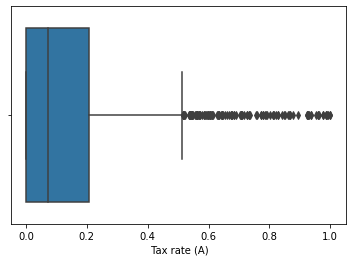

In [53]:
sns.boxplot(final_df[' Tax rate (A)'])

In [64]:
def outlier_detection(df):
    for i in df.columns:
        if i =='Bankrupt?':
            break
        else:
            sns.boxplot(df[i])
            plt.show()

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


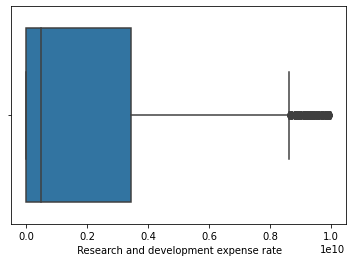

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


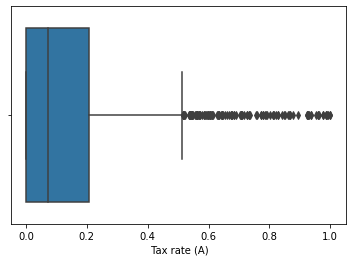

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


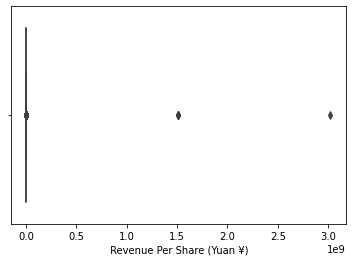

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


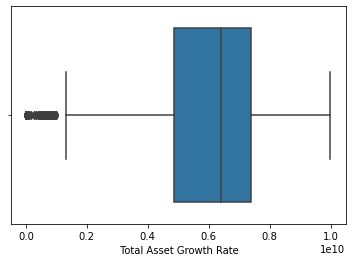

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


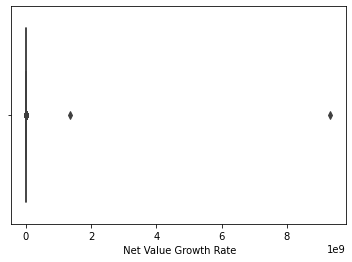

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


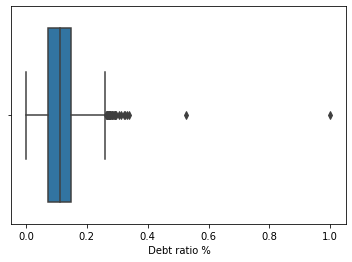

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


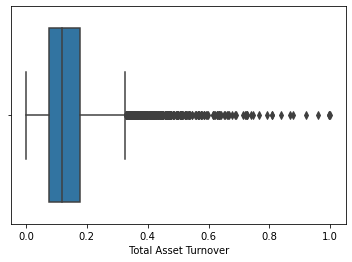

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


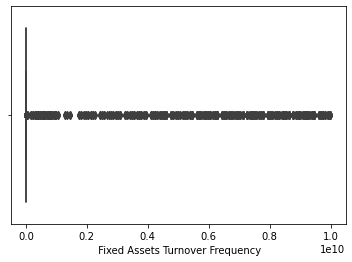

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


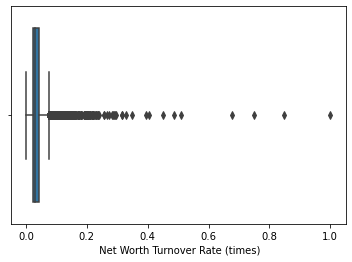

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


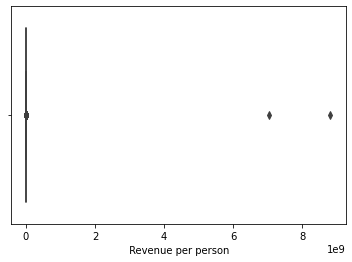

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


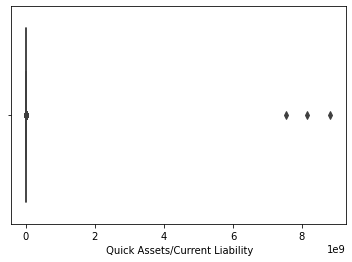

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


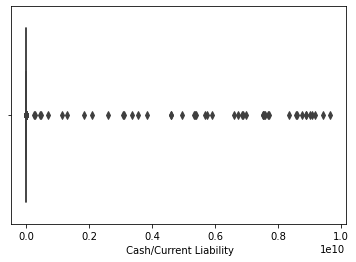

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


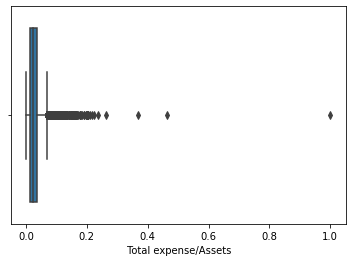

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


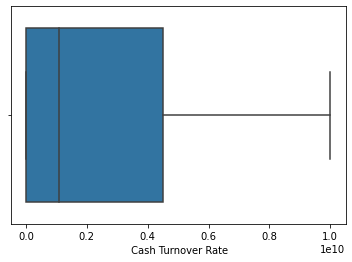

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


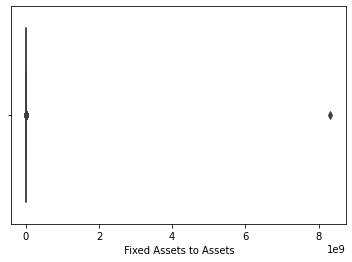

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


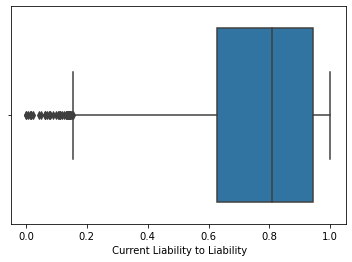

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


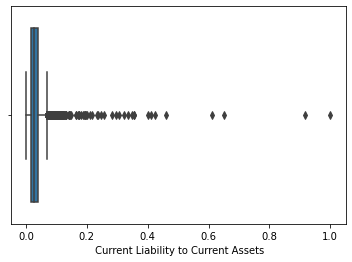

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


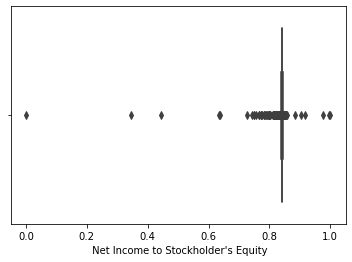

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


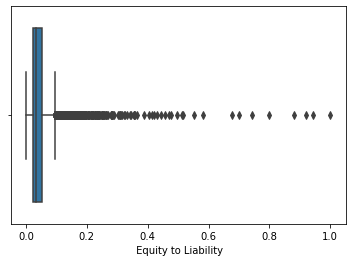

In [65]:
outlier_detection(final_df)

## Remove Outliers 

In [67]:
def kdeplt(df):
    for i in df.columns:
        if i =='Bankrupt?':
            break
        else:
            sns.kdeplot(df[i])
            plt.show()

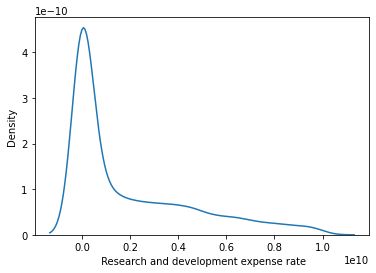

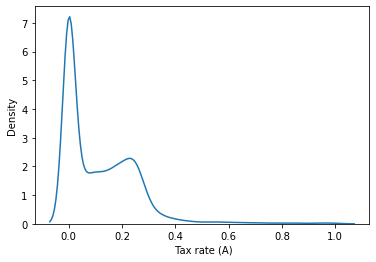

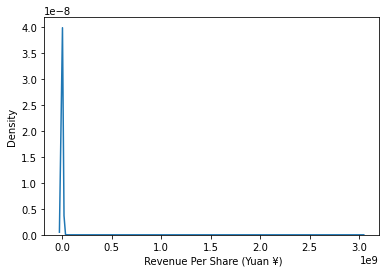

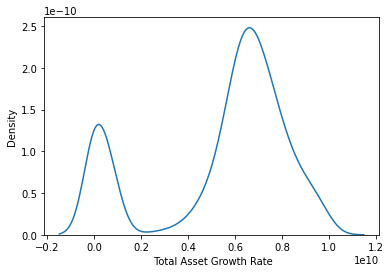

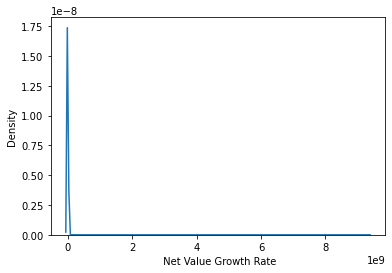

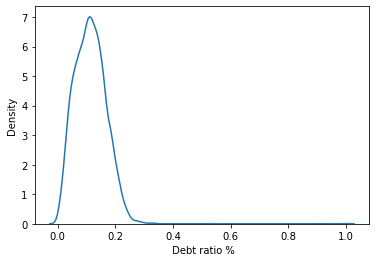

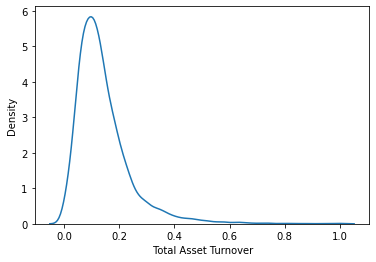

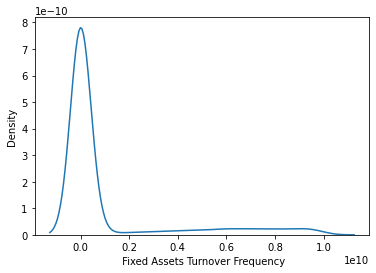

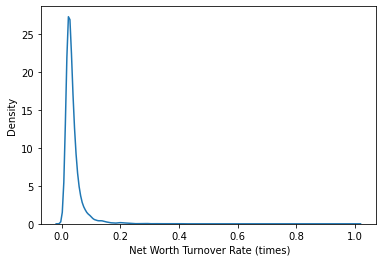

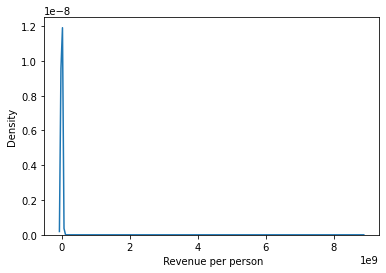

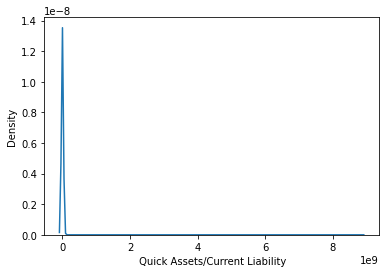

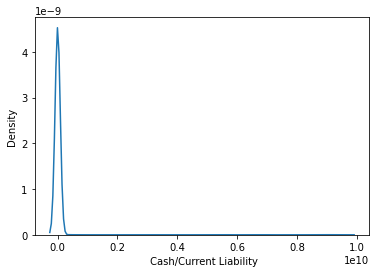

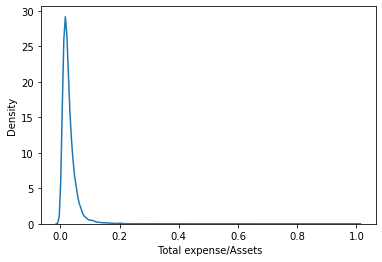

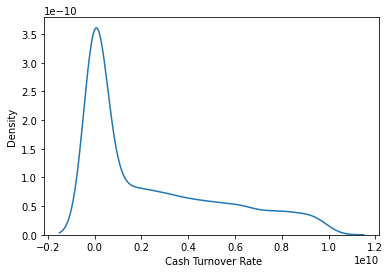

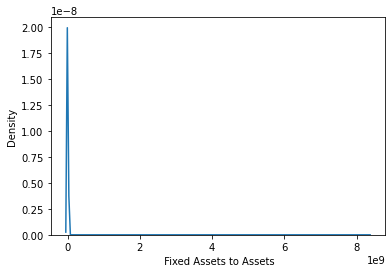

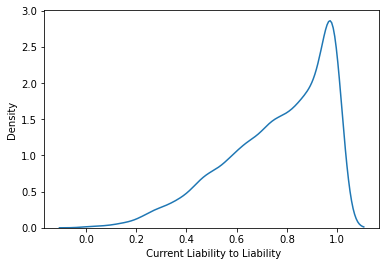

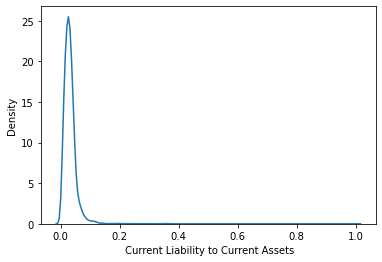

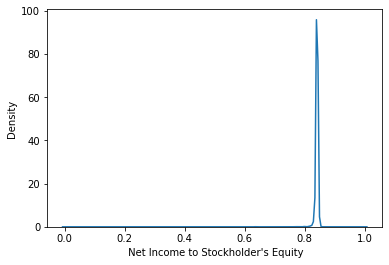

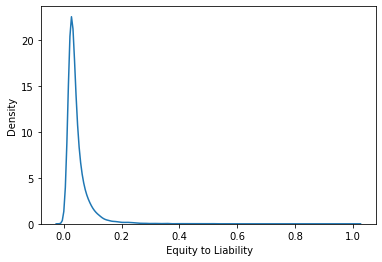

In [68]:
kdeplt(final_df)

In [69]:
final_df[' Total Asset Growth Rate']

0       4.980000e+09
1       6.110000e+09
2       7.280000e+09
3       4.880000e+09
4       5.510000e+09
            ...     
6814    7.070000e+09
6815    5.220000e+09
6816    5.990000e+09
6817    7.250000e+09
6818    9.350000e+09
Name:  Total Asset Growth Rate, Length: 6819, dtype: float64

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Debt ratio %'>

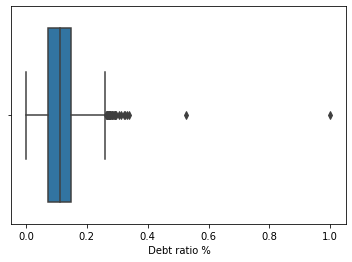

In [71]:
sns.boxplot(final_df[' Debt ratio %'])

In [74]:
q1 = final_df[' Debt ratio %'].quantile(0.25)
print("Q1: ",q1)

q3 = final_df[' Debt ratio %'].quantile(0.75)
print("Q3: ",q3)

iqr = q3-q1
print("IQR :",iqr)

Q1:  0.0728905281615624
Q3:  0.148804305106267
IQR : 0.0759137769447046


In [76]:
upper_limit = q3+1.5*iqr
print("Upper Limit: ",upper_limit)

lower_limit = q1-1.5*iqr
print("Lower limit: ",lower_limit)

Upper Limit:  0.2626749705233239
Lower limit:  -0.0409801372554945


In [77]:
final_df[' Debt ratio %'] = np.where(final_df[' Debt ratio %']>upper_limit,upper_limit,
                                    np.where(final_df[' Debt ratio %']<lower_limit,lower_limit,
                                             final_df[' Debt ratio %']))

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Debt ratio %'>

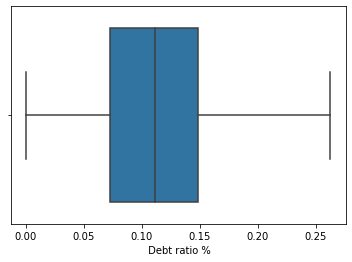

In [78]:
sns.boxplot(final_df[' Debt ratio %'])

In [81]:
def handle_outlier(df):
    for i in df.columns:
        print(i)
        # find q1
        q1 = df[i].quantile(0.25)
        # find q3 
        q3 = df[i].quantile(0.75)
        # calculate iqr
        iqr = q3-q1
        
        # find upper limit
        upper_limit = q3+1.5*iqr
        
        # find lower limit 
        lower_limit = q1-1.5*iqr
        
        df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))
        
    return df[i]
        
handle_outlier(final_df)

 Research and development expense rate
 Tax rate (A)
 Revenue Per Share (Yuan ¥)
 Total Asset Growth Rate
 Net Value Growth Rate
 Debt ratio %
 Total Asset Turnover
 Fixed Assets Turnover Frequency
 Net Worth Turnover Rate (times)
 Revenue per person
 Quick Assets/Current Liability
 Cash/Current Liability
 Total expense/Assets
 Cash Turnover Rate
 Fixed Assets to Assets
 Current Liability to Liability
 Current Liability to Current Assets
 Net Income to Stockholder's Equity
 Equity to Liability
Bankrupt?


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6814    0.0
6815    0.0
6816    0.0
6817    0.0
6818    0.0
Name: Bankrupt?, Length: 6819, dtype: float64

In [82]:
def outlier_detection(df):
    for i in df.columns:
        if i =='Bankrupt?':
            break
        else:
            sns.boxplot(df[i])
            plt.show()

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


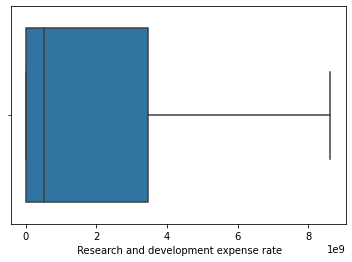

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


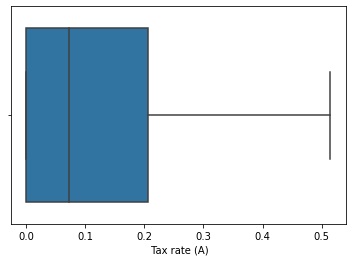

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


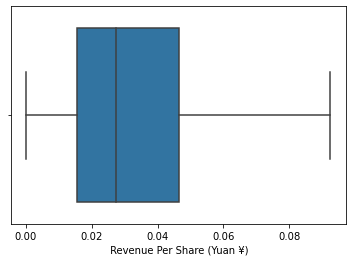

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


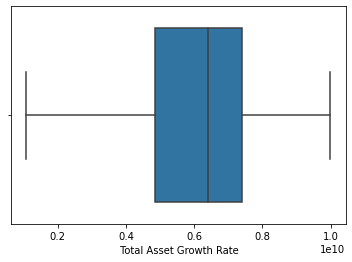

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


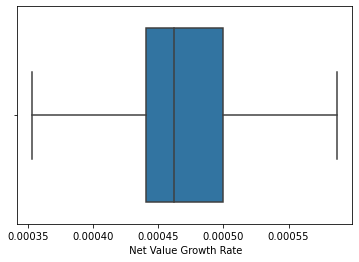

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


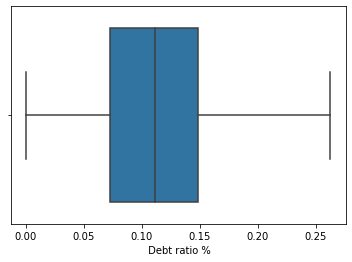

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


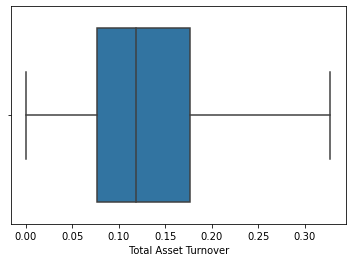

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


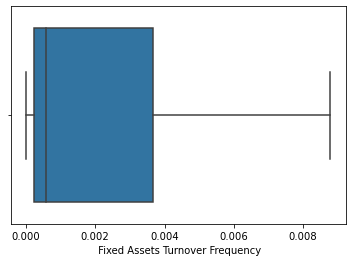

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


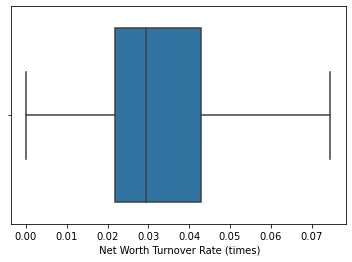

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


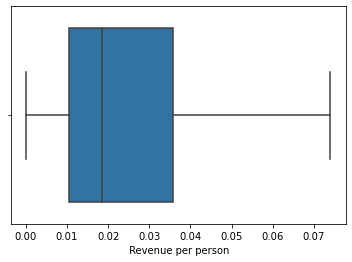

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


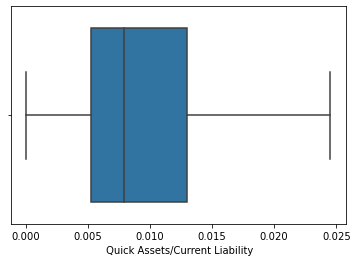

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


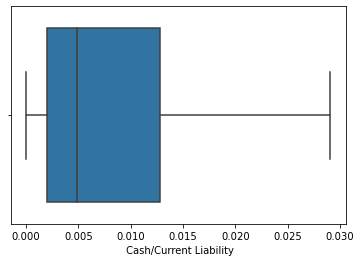

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


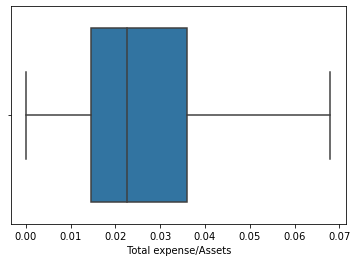

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


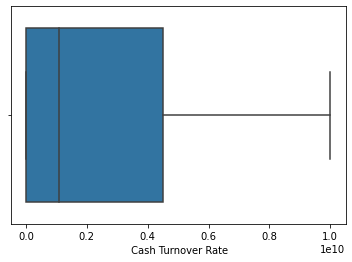

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


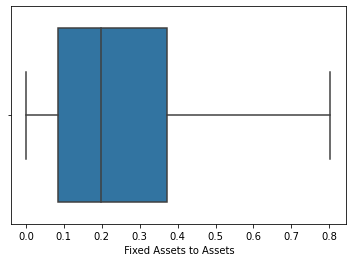

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


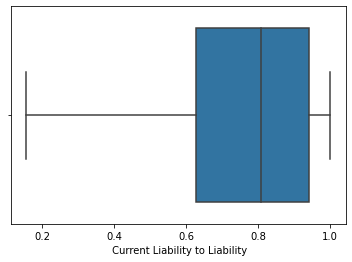

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


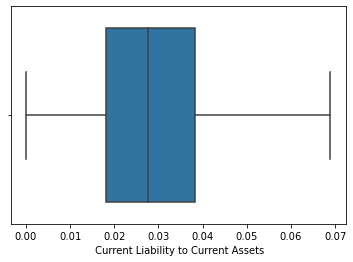

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


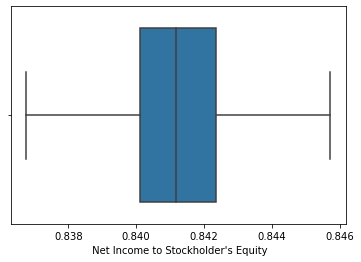

/home/shreyas/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


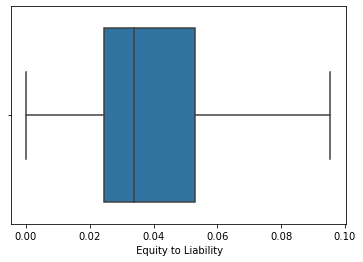

In [83]:
outlier_detection(final_df)

In [84]:
final_df.shape

(6819, 20)